In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm
import missingno as msno

In [2]:
plt.rcParams['figure.figsize'] = (8.0, 6.0)

In [3]:
CLN_DATA_PATH='../data/wind-power-production-us.csv'

try:
    wind_df = pd.read_csv(CLN_DATA_PATH)
    print("Data loaded successfully.")
except FileNotFoundError:
    print("ERROR: The data file does not exist.")

Data loaded successfully.


In [4]:
print(f"The shape of my dataset is: {wind_df.shape}")

The shape of my dataset is: (266, 126)


In [5]:
wind_df.head()

,date,other_united_states,other_new_england,other_connecticut,other_maine,other_massachusetts,other_new_hampshire,other_rhode_island,other_vermont,other_middle_atlantic,...,wind_new_mexico,wind_utah,wind_wyoming,wind_pacific_contiguous,wind_california,wind_oregon,wind_washington,wind_pacific_noncontiguous,wind_alaska,wind_hawaii
0,Jan 2001,6025,678,75,348,113,91,10,42,371,...,--,--,26,137,133,3,--,0,0,0
1,Feb 2001,5310,599,77,293,103,83,9,35,338,...,--,--,23,151,148,3,--,0,0,0
2,Mar 2001,5795,660,96,327,101,93,9,33,381,...,--,--,22,308,300,8,--,0,0,0
3,Apr 2001,5827,593,92,277,106,81,9,27,361,...,--,--,13,399,393,6,--,0,0,0
4,May 2001,5738,640,72,336,109,86,9,27,392,...,--,--,16,383,378,6,--,0,0,0


In [6]:
wind_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 126 entries, date to wind_hawaii
dtypes: float64(1), int64(80), object(45)
memory usage: 262.0+ KB


In [7]:
# Convert 'date' column to datetime format
wind_df['date'] = pd.to_datetime(wind_df['date'], format='%b %Y')

In [8]:
wind_df.describe()

,date,other_united_states,other_new_england,other_connecticut,other_maine,other_massachusetts,other_new_hampshire,other_rhode_island,other_vermont,other_middle_atlantic,...,wind_west_south_central,wind_texas,wind_mountain,wind_colorado,wind_wyoming,wind_pacific_contiguous,wind_california,wind_oregon,wind_pacific_noncontiguous,wind_hawaii
count,266,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,...,266.000000,266.000000,266.000000,266.000000,266.000000,266.00000,266.000000,266.000000,266.000000,266.000000
mean,2012-01-15 21:44:39.699248128,21369.578947,764.954887,68.244361,364.214286,143.560150,113.902256,21.244361,53.770677,866.721805,...,4357.627820,3338.755639,1390.774436,503.195489,281.458647,1573.74812,768.082707,389.003759,35.176692,29.304511
min,2001-01-01 00:00:00,5310.000000,511.000000,36.000000,250.000000,66.000000,46.000000,0.000000,15.000000,338.000000,...,56.000000,56.000000,16.000000,1.000000,12.000000,137.00000,109.000000,3.000000,0.000000,0.000000
25%,2006-07-08 18:00:00,8057.250000,632.250000,60.000000,321.500000,105.000000,85.000000,9.000000,35.250000,489.500000,...,654.750000,536.500000,256.250000,68.750000,58.250000,591.50000,396.000000,73.000000,4.000000,4.000000
50%,2012-01-16 12:00:00,17333.000000,714.500000,66.000000,354.000000,112.500000,108.000000,13.000000,46.000000,899.500000,...,3171.500000,2607.000000,1249.000000,426.000000,260.500000,1438.00000,643.500000,376.500000,33.000000,30.000000
75%,2017-07-24 06:00:00,32203.750000,885.000000,74.000000,397.750000,172.000000,138.750000,29.000000,72.000000,1207.750000,...,7470.500000,5599.000000,2180.000000,803.750000,406.250000,2418.25000,1096.500000,642.500000,59.750000,48.000000
max,2023-02-01 00:00:00,64877.000000,1259.000000,113.000000,556.000000,323.000000,202.000000,85.000000,117.000000,1653.000000,...,16504.000000,12730.000000,5450.000000,1794.000000,1316.000000,3835.00000,2030.000000,1145.000000,93.000000,80.000000
std,NaN,14675.645809,162.495184,11.947861,59.372276,54.526903,37.695976,18.803363,22.851862,368.339340,...,4104.886437,3050.384340,1248.677003,437.842885,250.477928,1029.66005,489.031049,302.210192,28.411710,22.690563


In [9]:
wind_df.apply(lambda x: x.nunique(), axis=0)

date                          266
other_united_states           265
other_new_england             207
other_connecticut              55
other_maine                   160
                             ... 
wind_oregon                   221
wind_washington               215
wind_pacific_noncontiguous     84
wind_alaska                    21
wind_hawaii                    68
Length: 126, dtype: int64

In [10]:
wind_df.duplicated().sum()

0

In [11]:
wind_df.isna().sum()

date                          0
other_united_states           0
other_new_england             0
other_connecticut             0
other_maine                   0
                             ..
wind_oregon                   0
wind_washington               0
wind_pacific_noncontiguous    0
wind_alaska                   0
wind_hawaii                   0
Length: 126, dtype: int64

no missing data, but i have seen that -- its been use in some rows, meaning that we must do somenthing about this 

for the purpose of the study i would drop the colums that not represent states in the country. 

In [12]:
columns_to_drop = [
    'wind',
    'wind_united_states',
    'wind_middle_atlantic',
    'wind_east_north_central',
    'wind_west_north_central',
    'wind_south_atlantic',
    'wind_district_of_columbia',
    'wind_east_south_central',
    'wind_west_south_central',
    'wind_mountain',
    'wind_pacific_contiguous',
    'wind_pacific_noncontiguous'
]

dropped_columns = [col for col in columns_to_drop if col in wind_df.columns]
wind_states_df = wind_df.drop(columns=dropped_columns)

In [13]:
wind_states_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 114 entries, date to wind_hawaii
dtypes: datetime64[ns](1), int64(72), object(41)
memory usage: 237.0+ KB


In [14]:
wind_states_df.wind_maine.unique()

array(['--', '12', '10', '8', '6', '14', '17', '11', '9', '7', '13', '16',
       '31', '27', '29', '23', '20', '18', '21', '38', '30', '40', '44',
       '33', '26', '70', '59', '68', '63', '76', '71', '64', '36', '39',
       '41', '81', '85', '73', '106', '97', '84', '82', '48', '55', '50',
       '61', '96', '58', '104', '89', '100', '98', '66', '56', '75', '87',
       '130', '121', '101', '120', '103', '67', '46', '126', '93', '136',
       '114', '132', '113', '99', '62', '77', '129', '167', '164', '157',
       '138', '128', '107', '117', '105', '144', '163', '226', '216',
       '248', '246', '181', '177', '159', '102', '134', '140', '209',
       '259', '262', '272', '223', '279', '192', '173', '149', '124',
       '240', '249', '247', '275', '255', '158', '148', '116', '108',
       '161', '203', '258', '290', '179', '264', '238', '123', '92',
       '197', '254', '267', '328', '250', '199', '201', '131', '166',
       '286', '292', '274', '296', '285', '198', '171', '170', 

It looks like there are different value types for missing values, both are strings and will need to get changed to NaN to be classified as a null value. Right now pandas thinks these are strings are not missing values

In [15]:
wind_states_df.replace(['--', 'NM'], np.NaN, inplace=True)
wind_states_df.wind_maine.unique()

C:\Users\pier3\AppData\Local\Temp\ipykernel_6564\125886047.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  wind_states_df.replace(['--', 'NM'], np.NaN, inplace=True)


array([nan, '12', '10', '8', '6', '14', '17', '11', '9', '7', '13', '16',
       '31', '27', '29', '23', '20', '18', '21', '38', '30', '40', '44',
       '33', '26', '70', '59', '68', '63', '76', '71', '64', '36', '39',
       '41', '81', '85', '73', '106', '97', '84', '82', '48', '55', '50',
       '61', '96', '58', '104', '89', '100', '98', '66', '56', '75', '87',
       '130', '121', '101', '120', '103', '67', '46', '126', '93', '136',
       '114', '132', '113', '99', '62', '77', '129', '167', '164', '157',
       '138', '128', '107', '117', '105', '144', '163', '226', '216',
       '248', '246', '181', '177', '159', '102', '134', '140', '209',
       '259', '262', '272', '223', '279', '192', '173', '149', '124',
       '240', '249', '247', '275', '255', '158', '148', '116', '108',
       '161', '203', '258', '290', '179', '264', '238', '123', '92',
       '197', '254', '267', '328', '250', '199', '201', '131', '166',
       '286', '292', '274', '296', '285', '198', '171', '170', '

In [16]:
# Iterate over each column in the DataFrame
for column in wind_states_df.columns:
    # Check if the column is of object type
    if wind_states_df[column].dtype == 'object':
        # Use pd.to_numeric to convert all values to numbers, errors='coerce' will convert errors (non-convertible values) to NaN
        wind_series = pd.to_numeric(wind_states_df[column], errors='coerce')

# Check if all values in the temp_series are not NaN (meaning all could be converted to numbers) 
        # and check if after dropping NaN values, the Series is not empty
        if not wind_series.isnull().all() and not wind_series.dropna().empty:
            # Convert the original column to numeric type, then to int64 if possible
            wind_states_df[column] = pd.to_numeric(wind_states_df[column], errors='coerce').astype('Int64')

In [17]:
wind_states_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 114 entries, date to wind_hawaii
dtypes: Int64(34), datetime64[ns](1), float64(7), int64(72)
memory usage: 245.9 KB


In [18]:
wind_states_df.wind_vermont.unique()

array([ 1,  0,  2,  5, 11, 12,  9,  8,  7,  4, 14, 13, 23, 22, 18, 20, 21,
       15, 16, 25, 31, 34, 27, 17, 32, 33, 38, 30, 29, 26, 24, 28, 39, 41,
       35, 36, 37, 42, 19, 45, 40, 43, 49], dtype=int64)

In [19]:
# Dropping columns where data type is float64 due to the column only containing null values
empty_states = [col for col in wind_states_df.columns if wind_states_df[col].dtype == 'float64' and wind_states_df[col].isna().all()]
wind_states_df = wind_states_df.drop(columns=empty_states)

a new and more accurate view of the missing data

<Axes: >

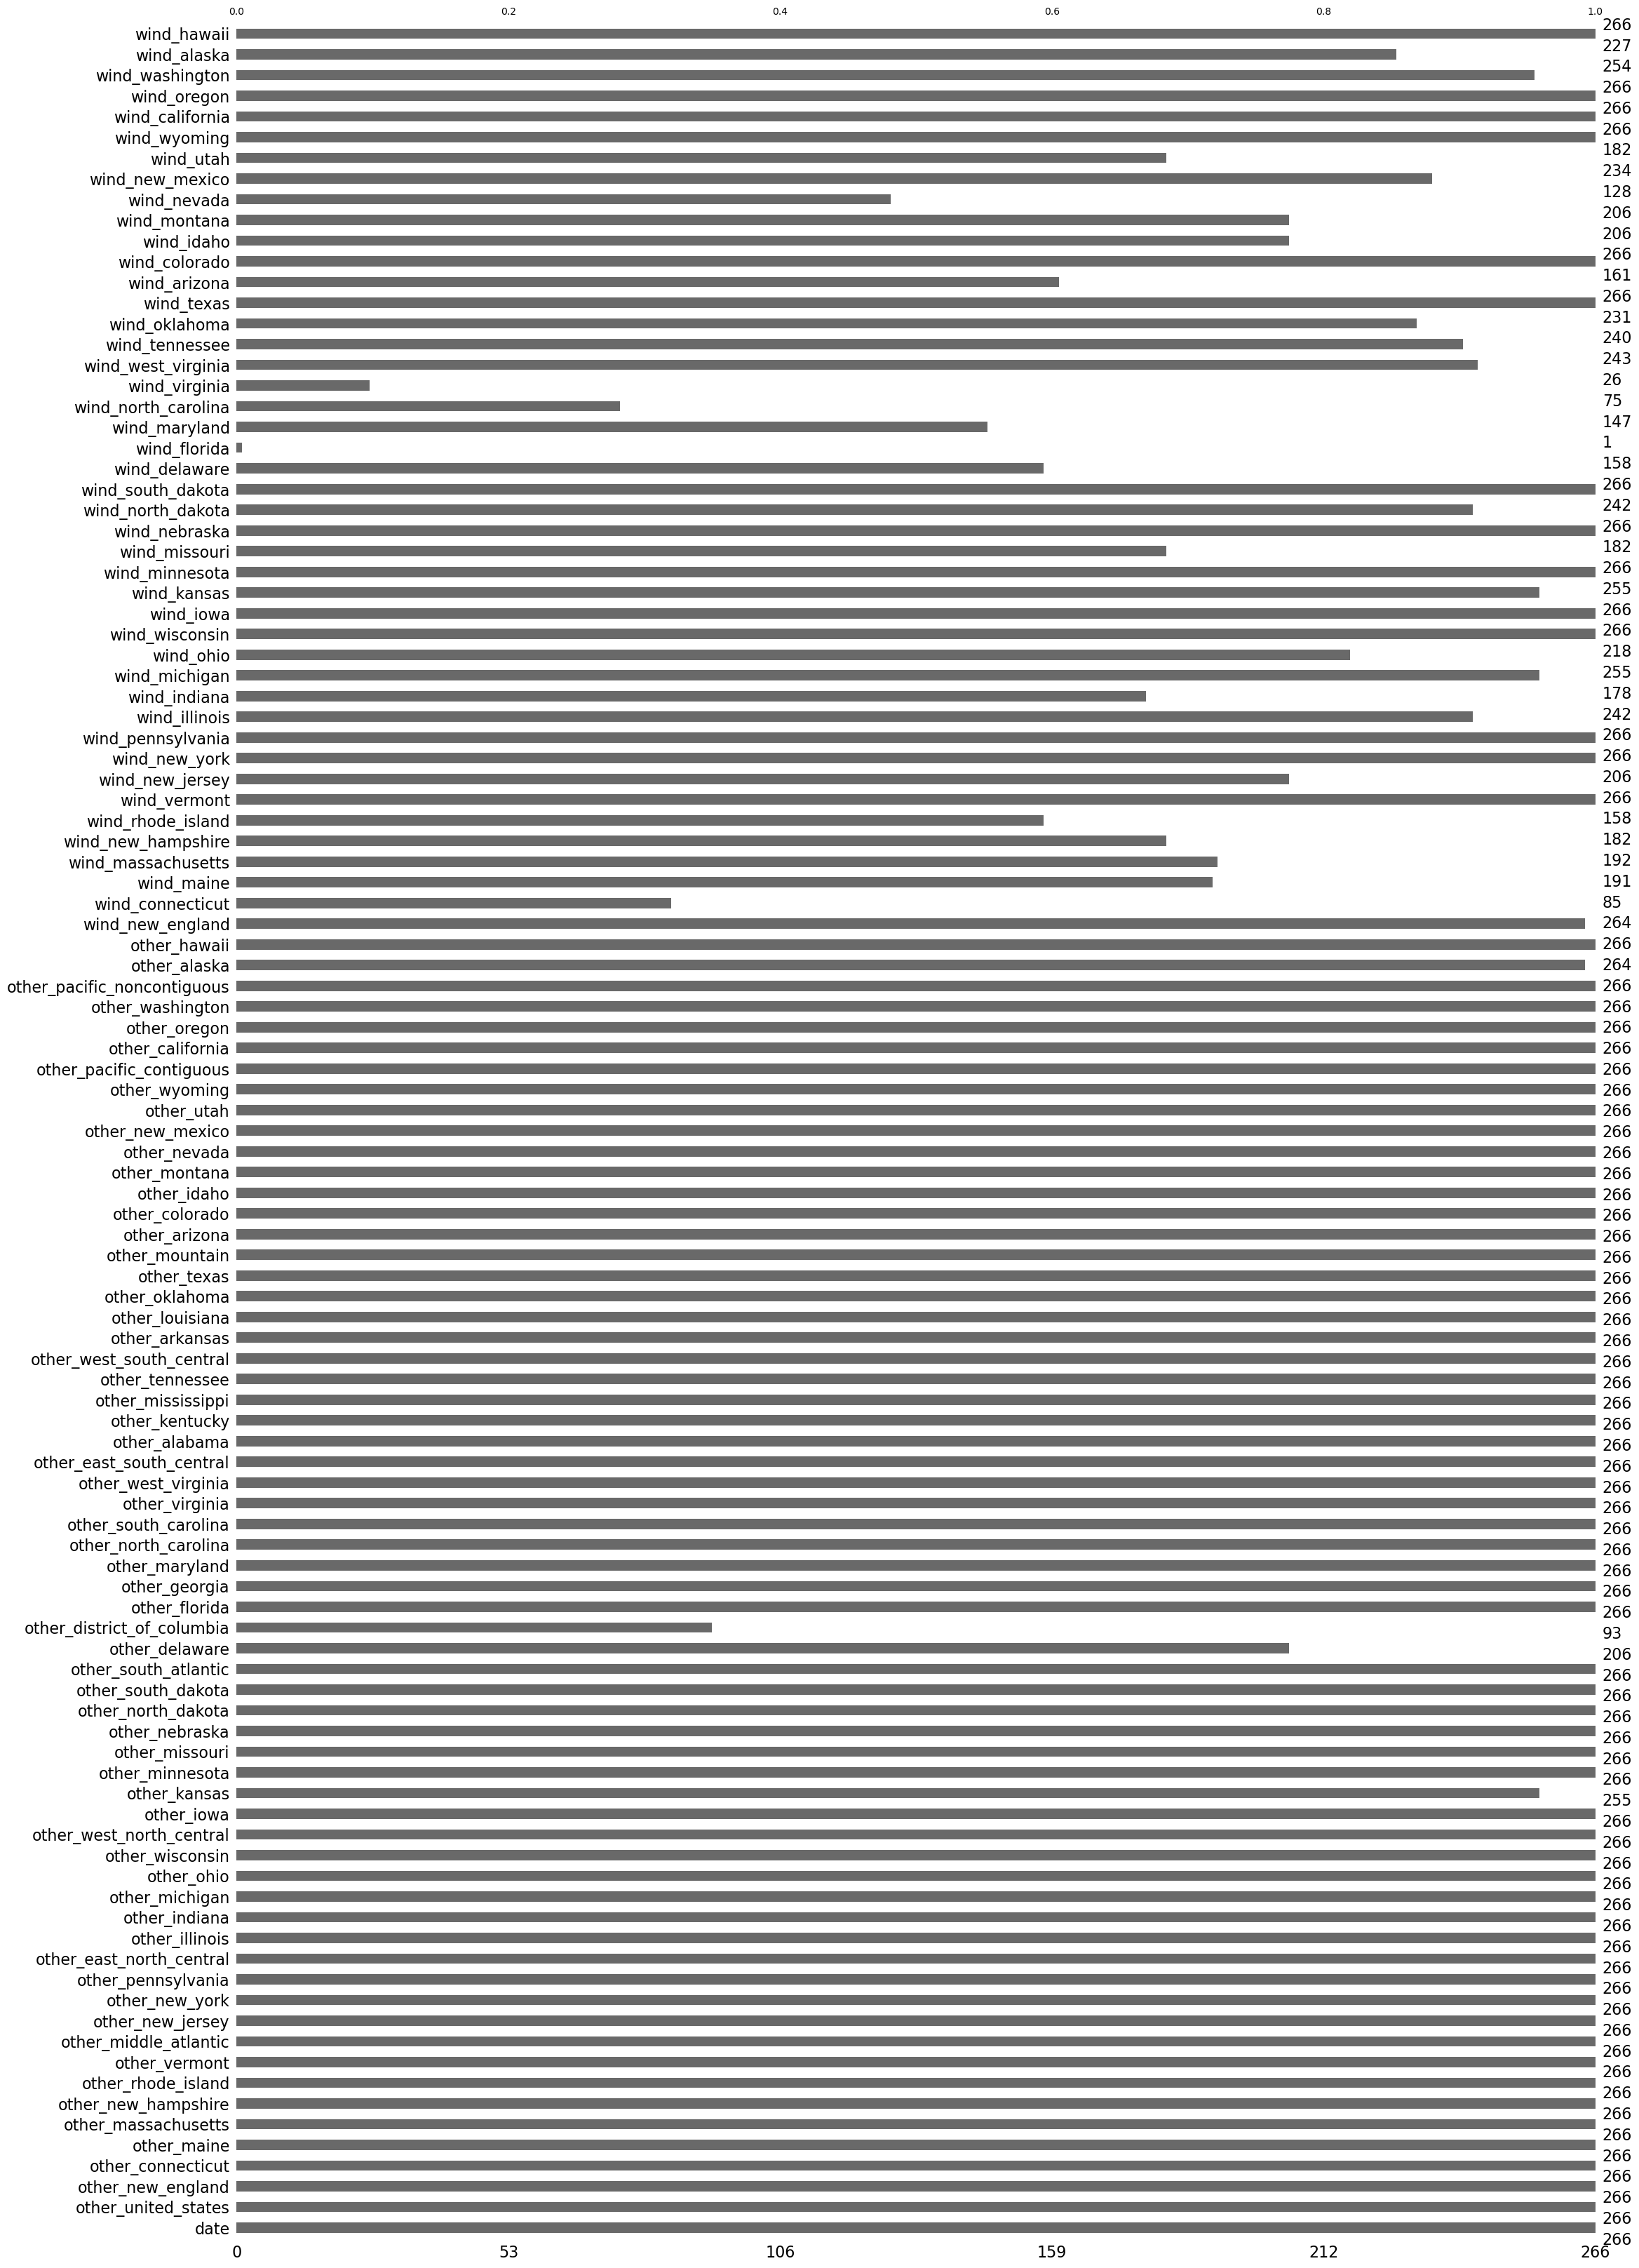

In [20]:
msno.bar(wind_states_df)

In [21]:
wind_states_df.isnull().sum()

date                    0
other_united_states     0
other_new_england       0
other_connecticut       0
other_maine             0
                       ..
wind_california         0
wind_oregon             0
wind_washington        12
wind_alaska            39
wind_hawaii             0
Length: 107, dtype: int64